In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import cm
# from scipy.constants import h, c, k
from astropy import units as u
from astropy import constants as const

# import bexrb_reflection as bexrb

from importlib import reload

import pandas as pd
from scipy.interpolate import CubicSpline
from scipy import integrate

import ogle_ref as o #module
from scipy.optimize import curve_fit
from astropy.table import Table,join,vstack,unique
    
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches    
    
blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'


sigma_T=(const.sigma_T).cgs.value
sigma_SB=(const.sigma_sb).cgs.value
sigma_wien = 0.2897755
evtoerg = 1.6e-12
kpc_to_cm = 3.086e21
A_to_cm = (u.angstrom).to(u.cm)


c=(const.c).cgs.value
k=(const.k_B).cgs.value
h=(const.h).cgs.value

In [2]:
def read_data(file_path):
    # Read OGLE IV data
    data = Table.read(file_path,format='ascii',names=['MJD-50000','I mag','I mag err'])

    # Select the first 6 rows (if needed)
    # data = data.head(6)

    return data

### Walkthrough
For each source we load optical and X-ray data and plot the resulting lightcurves after fitting for the flair

Most part is performed by o.ozoom_fit3 function that takes arguments tabulated data, and reference date of flare in MJD-50000 format.


### SMC X-2

In [3]:
odata = 'DATA/OPT/smc720.17.50.dat'
iband = read_data(odata)
xfile = 'DATA/XRAY/SMC_X2_curve2_plain.dat'
datax = pd.read_csv(xfile, comment='!', sep=r'\s+', skiprows=7,usecols=range(6), header=None)

0.003
Chi-squared: 5045.949668123611, Reduced Chi-squared: 77.63, DOF: 72.00/7.00
Amplitude (A): 0.162 ± 0.012
Peak time (t0): 7297.95 ± 3.97
Sigma (left): 13.02 ± 3.44
Sigma (right): 27.53 ± 3.88
Fitted parameters: [1.46048319e+01 2.22229692e-05 1.12534086e-06 1.62142074e-01
 7.29795378e+03 1.30206614e+01 2.75314583e+01]
Peak intensity: 14.71074756568751 0.18274756568751016
Peak intensity: 14.710224325021981 0.16214207377985276


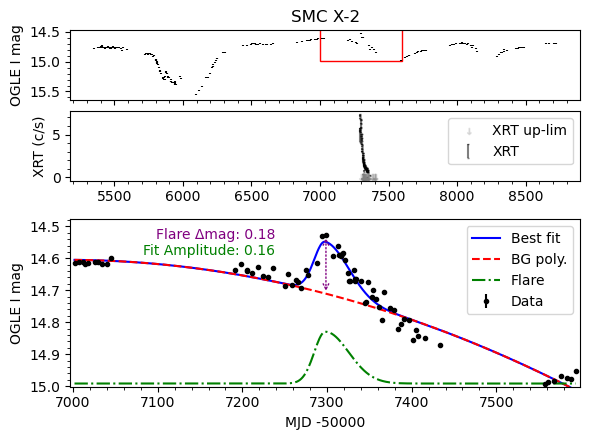

In [4]:
Peak = o.ozoom_fit3(iband,datax,7000,7600,title='SMC X-2',figsize=(6, 4.5))
# o.sf('SMC_X2_v33')

### SXP 4.78

In [5]:
odata = 'DATA/OPT/smc719.21.22049.dat'
iband = read_data(odata)
xfile = 'DATA/XRAY/SXP4p78_curve2_plain.dat'
datax = pd.read_csv(xfile, comment='!', sep=r'\s+', skiprows=12,usecols=range(6), header=None)

0.003
Chi-squared: 4127.096282885639, Reduced Chi-squared: 35.58, DOF: 123.00/7.00
Amplitude (A): 0.098 ± 0.005
Peak time (t0): 8451.71 ± 2.21
Sigma (left): 12.16 ± 2.18
Sigma (right): 30.25 ± 3.14
Fitted parameters: [ 1.55766663e+01 -2.73745136e-04  3.06748337e-07  9.79241717e-02
  8.45170719e+03  1.21598746e+01  3.02505994e+01]
Peak intensity: 15.51855018014982 0.12655018014982033
Peak intensity: 15.518541269320737 0.09792417165794162


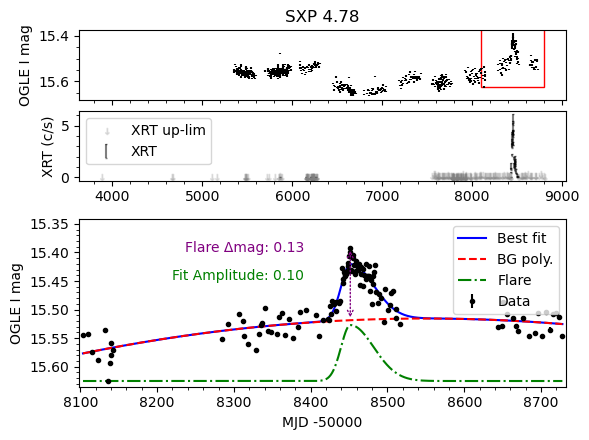

In [6]:
Peak = o.ozoom_fit3(iband,datax,8100,8800,title='SXP 4.78',figsize=(6, 4.5))
# o.sf('SXP_4p78_v1')

### SXP 5.05

In [7]:
odata = 'DATA/OPT/smc719.18.378.dat'
iband = read_data(odata)
xfile = 'DATA/XRAY/sxp5p05_curve2_plain.dat'
datax = pd.read_csv(xfile, comment='!', sep=r'\s+', skiprows=7,usecols=range(6), header=None)

0.003
Chi-squared: 14331.270535182697, Reduced Chi-squared: 130.28, DOF: 117.00/7.00
Amplitude (A): 0.279 ± 0.014
Peak time (t0): 6555.93 ± 3.13
Sigma (left): 9.04 ± 2.52
Sigma (right): 94.08 ± 5.91
Fitted parameters: [ 1.59563573e+01  1.11733641e-04 -3.96653183e-07  2.79174051e-01
  6.55593436e+03  9.03925719e+00  9.40801398e+01]
Peak intensity: 15.942465087624655 0.33346508762465454
Peak intensity: 15.946321499785853 0.27917405133848927


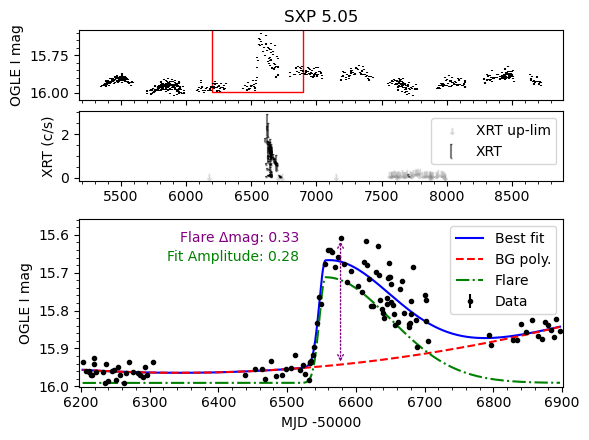

In [8]:
Peak = o.ozoom_fit3(iband,datax,6200,6900,title='SXP 5.05',figsize=(6, 4.5))
# o.sf('SXP_5p05_v1')

### SMC X-3

In [9]:
odata = 'DATA/OPT/smc719.20.144.dat'
iband = read_data(odata)
xfile = 'DATA/XRAY/SMC_X3_curve2_plain.dat'
datax = pd.read_csv(xfile, comment='!', sep=r'\s+', skiprows=7,usecols=range(6), header=None)

0.003
Chi-squared: 14235.841997414393, Reduced Chi-squared: 130.60, DOF: 116.00/7.00
Amplitude (A): 0.250 ± 0.013
Peak time (t0): 7625.88 ± 2.63
Sigma (left): 10.23 ± 2.58
Sigma (right): 72.75 ± 5.75
Fitted parameters: [ 1.47331800e+01 -2.09988611e-05  5.62251384e-08  2.49858930e-01
  7.62588215e+03  1.02309704e+01  7.27475985e+01]
Peak intensity: 14.732326892064423 0.31732689206442366
Peak intensity: 14.731621006176487 0.24985892991986217


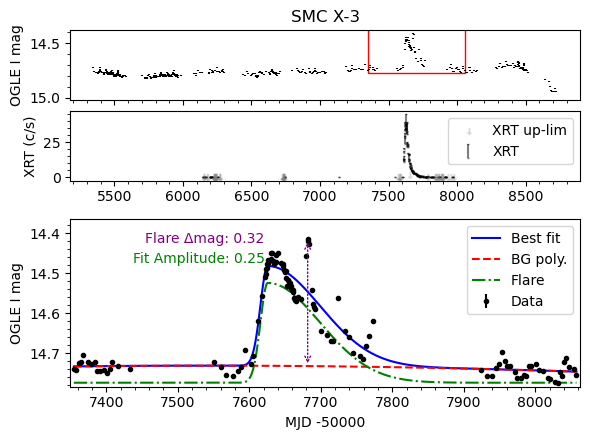

In [10]:
# o.ozoom(iband,7350,8100)
# Peak = o.ozoom_fit(iband,7350,8060)
# plt.title('SMC X-3')
# Peak = o.ozoom_fit2(iband,7350,8060,title='SMC X-3')
Peak = o.ozoom_fit3(iband,datax,7350,8060,title='SMC X-3',figsize=(6, 4.5))
# o.sf('SMC_X3_v1')


## LXP 8.04

In [11]:
iband = Table.read('DATA/OPT/RXJ0520_OIV.dat',format='ascii',names=['JD','I mag','I mag err'])

iband['MJD-50000'] = iband['JD']-2450000.5

# odata = 'OGLE/RXJ0520_OIV.dat'
# iband = read_data(odata)
# iband['MJD-50000'] = iband['JD']-2450000.5
xfile = 'DATA/XRAY/J0520_curve2_plain.dat'
datax = pd.read_csv(xfile, comment='!', sep=r'\s+', skiprows=7,usecols=range(6), header=None)

0.003
Chi-squared: 2447.964259402167, Reduced Chi-squared: 44.51, DOF: 62.00/7.00
Amplitude (A): 0.115 ± 0.009
Peak time (t0): 6670.41 ± 5.48
Sigma (left): 16.37 ± 5.26
Sigma (right): 52.37 ± 10.81
Fitted parameters: [ 1.44082389e+01  8.64745270e-05 -1.74026699e-07  1.15473330e-01
  6.67041135e+03  1.63687952e+01  5.23737948e+01]
Peak intensity: 14.41851549127542 0.1335154912754195
Peak intensity: 14.418925316567362 0.11547333019363745


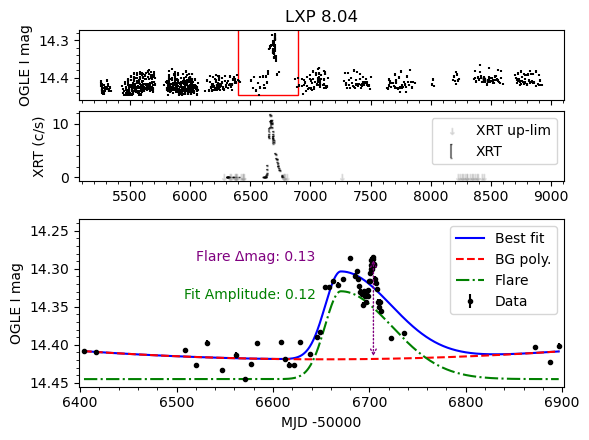

In [12]:
# o.ozoom(iband,6400,7000)
# Peak = o.ozoom_fit2(iband,6400,6900,title='LXP 8.04')
Peak = o.ozoom_fit3(iband,datax,6400,6900,title='LXP 8.04',figsize=(6, 4.5))
# plt.axvline(6700)
# ax1.axvline(6700)

### Swift J0243
Multiple optical data-sets in constrast to OGLE, thus we do not use quick functions

In [13]:
#Liu et al. optical data
iband2 = Table.read('DATA/OPT/Liu_J0243.dat',format='ascii',names=['MJD','cam','B mag','B mag err','V mag','V mag err','R mag','R mag err','I mag','I mag err'])
iband2['MJD-50000'] = iband2['MJD']-50000
mask = (iband2['V mag'] > 0) & (iband2['I mag'] > 0)
iband2 =iband2[mask]

#ASAS-SN data
iband = Table.read('DATA/OPT/J0243_AP3868237.csv',format='csv',names=['JD','cam','V mag','V mag err','f ','f err'])
iband['MJD-50000'] = iband['JD']-2450000.5

xfile = 'DATA/XRAY/J0243_curve2_plain.dat'
datax = pd.read_csv(xfile, comment='!', sep=r'\s+', skiprows=7,usecols=range(6), header=None)

mjdx = datax[0]
ratex = datax[3]
ratepos = datax[4]
rateneg = -datax[5]
scale= 50000.0
mask1x = (ratepos > 0) & (mjdx <58800)
mask2x = (ratepos == 0) & (mjdx <58800)

In [14]:
title='J0243'
mjd1 = 8000
mjd2 = 8200


mask_I = (iband2['MJD-50000'] > mjd1) & (iband2['MJD-50000'] < mjd2)
time = iband2['MJD-50000'][mask_I]
mag = iband2['I mag'][mask_I]
err_mag = iband2['I mag err'][mask_I]



# Initial guess for the flare peak time
initial_t0 = 8065

# Perform the fit
popt, pcov = o.fit_time_series(time, mag, err_mag, initial_t0)

# Extract the optimized parameters
a0, a1, a2, A, t0, sigma_left, sigma_right = popt

# Extract the diagonal of the covariance matrix to get the variances
perr = np.sqrt(np.diag(pcov))

# Print the best-fit parameters and their 1-sigma uncertainties
print(f"Amplitude (A): {A:.3f} ± {perr[3]:.3f}")
print(f"Peak time (t0): {t0:.2f} ± {perr[4]:.2f}")
print(f"Sigma (left): {sigma_left:.2f} ± {perr[5]:.2f}")
print(f"Sigma (right): {sigma_right:.2f} ± {perr[6]:.2f}")

print("Fitted parameters:", popt)


tmod = np.linspace(np.min(time), np.max(time), 1000)
ymodel = o.model_function(tmod, *popt)
polynomial_comp = o.background_polynomial(tmod - np.min(time), a0, a1, a2)
flare_comp = -o.two_sided_gaussian(tmod, A, t0, sigma_left, sigma_right)  # Negative for magnitude

# Calculate the magnitude difference
min_mag_index = np.argmin(mag)
brightest_time = time[min_mag_index]
brightest_mag = mag[min_mag_index]
background_mag = o.background_polynomial(brightest_time - np.min(time), a0, a1, a2)
magnitude_difference = background_mag - brightest_mag
background_magA = o.background_polynomial(t0-np.min(time), a0, a1, a2)

print('Peak intensity:', background_mag, magnitude_difference)
print('Peak intensity:', background_magA, A)

0.02
Chi-squared: 205.58013870759328, Reduced Chi-squared: 4.20, DOF: 56.00/7.00
Amplitude (A): 0.213 ± 0.020
Peak time (t0): 8063.95 ± 2.39
Sigma (left): 6.69 ± 2.00
Sigma (right): 16.16 ± 3.16
Fitted parameters: [ 1.12084873e+01 -1.42277928e-04  5.87313147e-06  2.12866688e-01
  8.06395346e+03  6.68834871e+00  1.61633626e+01]
Peak intensity: 11.208106413457266 0.2591064134572658
Peak intensity: 11.20865223684486 0.21286668802477066


In [15]:
def my_plot():
    fig = plt.figure(figsize=(6,4.5))
    gs = gridspec.GridSpec(3, 1, height_ratios=[1,1, 3])  # Adjust height ratios as needed
    plt.subplots_adjust(hspace=0.0)

    # Upper panel (entire time series)
    ax0 = plt.subplot(gs[0])
    ax0.errorbar(iband2['MJD-50000'], iband2['V mag'], yerr=iband2['V mag err'], fmt='.', color='black',alpha=0.3, label='Liu et al.')
    ax0.errorbar(iband['MJD-50000'], iband['V mag']+0.2, yerr=iband['V mag err'], fmt='.', color='orange',alpha=0.3, label='ASAS–SN')
    ax0.invert_yaxis()
    ax0.set_ylabel('V mag')
    ax0.set_title(title)
    ax0.legend()

    # Draw a rectangle indicating the zoomed-in region
    zoom_rect = patches.Rectangle((mjd1, 12.3), mjd2 - mjd1, 0.6 , linewidth=1,
                                  edgecolor='red', facecolor='none')
    ax0.add_patch(zoom_rect)

    # mid panel (entire xtime series)
    ax1 = plt.subplot(gs[1],sharex=ax0)
    ax1.errorbar(mjdx[mask1x]-scale, ratex[mask1x], yerr=[rateneg[mask1x], ratepos[mask1x]], fmt=' ', label='XRT', capsize=1, color='black', alpha=0.5, zorder=-10)
    # ax1.scatter(mjdx[mask2x]-scale, ratex[mask2x], c='grey',marker=r'$\downarrow$',s=20, label='XRT up-lim', alpha=0.2 )
    ax1.set_ylabel('XRT (c/s)')
    # ax1.set_xlabel('MJD -50000')
    # ax1.set_yscale('log')
    ax1.legend()


    # Lower panel (zoomed-in)
    ax2 = plt.subplot(gs[2])
    ax2.errorbar(time, mag, yerr=err_mag, fmt='.', label='Liu et al.', color='black')
    ax2.plot(tmod, ymodel, label='Best fit', color='blue')
    ax2.plot(tmod, polynomial_comp, label='BG poly.', color='red', linestyle='--')
    ax2.plot(tmod, np.max(mag) + flare_comp, label='Flare', color='green', linestyle='-.')

    ax2.annotate('', xy=(brightest_time, brightest_mag), xytext=(brightest_time, background_mag),
                 arrowprops=dict(arrowstyle='<->', color='purple', ls=':'))

    text_x = brightest_time + 70  # Adjust as needed
    text_y = brightest_mag  # y-position at the brightest magnitude point
    ax2.text(text_x, text_y, f"Flare Δmag: {magnitude_difference:.2f}",
             horizontalalignment='right', verticalalignment='center', color='purple')

    text_y2 = brightest_mag + 0.05  # Adjust y-position slightly above the first line
    ax2.text(text_x, text_y2, f"Fit Amplitude: {A:.2f}",
             horizontalalignment='right', verticalalignment='center', color='green')

    ax2.set_xlabel('MJD -50000')
    ax2.set_ylabel('I mag')
    ax2.invert_yaxis()
    ax2.set_xlim(np.min(time) - 5, np.max(time) + 5)
    ax2.set_ylim(np.max(mag) + 0.01, np.min(mag) - 0.05)
    ax2.legend(loc='upper right')
    # ax1.set_title('Zoomed-In Light Curve Fitting')

    ax0.tick_params(labelbottom=False)
    plt.tight_layout()
    plt.minorticks_on()
    ax0.minorticks_on()
    ax1.minorticks_on()
    ax2.minorticks_on()
    title2=title.replace(" ", "_")
    # # plt.show()

     # Adjust panel positions manually
    ax0_pos = ax0.get_position()  # Get the original position of ax0
    ax1_pos = ax1.get_position()  # Get the original position of ax1
    ax2_pos = ax2.get_position()  # Get the original position of ax2

    # #     # Modify positions to make ax0 and ax1 touch
    ax0.set_position([ax0_pos.x0, ax0_pos.y0 - 0.03, ax0_pos.width, ax0_pos.height+0.03])
    ax1.set_position([ax1_pos.x0, ax1_pos.y0 - 0.00, ax1_pos.width, ax1_pos.height+0.03])
    ax2.set_position([ax2_pos.x0, ax2_pos.y0, ax2_pos.width, ax2_pos.height+0.02])
    
    
    # plt.show()

# o.sf(title2+'_test')

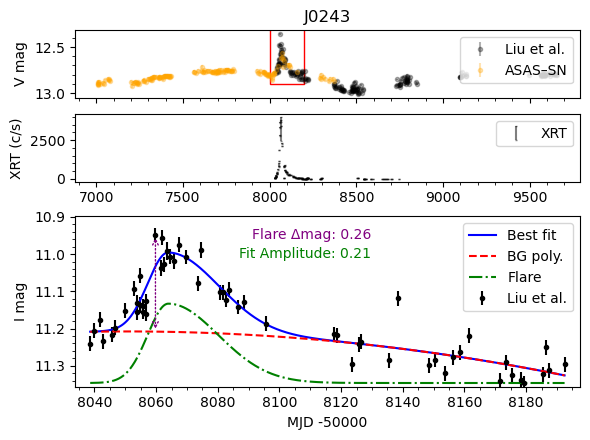

In [16]:
ppp = my_plot()
o.sf(title+'_v3')